# LOADING THE DATASET

In [20]:
import pandas as pd
data = pd.read_csv('enhanced_washing_room.csv')
data.head()

,Date,Day,Time Slot,User Count,Cycle Duration,Special Day,Weather
0,01-11-2023,Wednesday,02:30:00,2,54,0,Rainy
1,01-11-2023,Wednesday,07:00:00,11,30,0,Rainy
2,01-11-2023,Wednesday,07:30:00,9,30,0,Rainy
3,01-11-2023,Wednesday,09:00:00,18,35,0,Rainy
4,01-11-2023,Wednesday,11:30:00,9,20,0,Rainy


### Feature Descriptions:

1. **Date** (object):  
   The date of the observation in "dd-mm-yyyy" format.

2. **Day** (object):  
   The day of the week (e.g., Monday, Tuesday, etc.).

3. **Time Slot** (object):  
   A specific time (24-hour format, e.g., "02:30:00", "14:00:00").

4. **User Count** (int64):  
   The number of users present during the time slot. This is the target variable.

5. **Cycle Duration** (int64):  
   Duration (in minutes) of the laundry cycle. **Removed from the dataset.**

6. **Special Day** (int64):  
   Indicates if it's a special day (e.g., public holiday).  
   - `0` = Normal day  
   - `1` = Special day

7. **Weather** (object):  
   The weather condition during the observation.  
   - "Sunny"  
   - "Cloudy"  
   - "Rainy"


# EXPLORATORY DATA ANALYSIS (EDA)

## DATA CLEANING / DATA PREPARATION
In the next code cell, the following steps were performed:

1. **Dropped the 'Cycle Duration' column**: This column was removed as it was not needed for the analysis.
   
2. **Removed duplicates**: Any duplicate rows were removed to ensure clean data for analysis.

3. **Checked for missing values**: We checked if there were any missing values in the dataset using `isnull().sum()`.

The cleaned data was then previewed using `head()` to confirm that the steps were applied correctly.

In [22]:
# Drop the 'Cycle Duration' column
data_cleaned = data.drop(columns=['Cycle Duration'])

# Remove duplicates, if any
data_cleaned = data_cleaned.drop_duplicates()
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'],format='%d-%m-%Y')

# Check for missing values
missing_values = data_cleaned.isnull().sum()

# Display the cleaned data preview and missing values summary
data_cleaned.head(), missing_values


(        Date        Day Time Slot  User Count  Special Day Weather
 0 2023-11-01  Wednesday  02:30:00           2            0   Rainy
 1 2023-11-01  Wednesday  07:00:00          11            0   Rainy
 2 2023-11-01  Wednesday  07:30:00           9            0   Rainy
 3 2023-11-01  Wednesday  09:00:00          18            0   Rainy
 4 2023-11-01  Wednesday  11:30:00           9            0   Rainy,
 Date           0
 Day            0
 Time Slot      0
 User Count     0
 Special Day    0
 Weather        0
 dtype: int64)

## DATA VISUALISATION


1. **Effect of Weather on User Count (Boxplot)**:

   - **x-axis**: Weather conditions
   - **y-axis**: User count distribution
  

2. **Effect of Special Days (Holidays) on User Count (Boxplot)**:
   
   - **x-axis**: Special day (0 = Normal day, 1 = Holiday)
   - **y-axis**: User count distribution

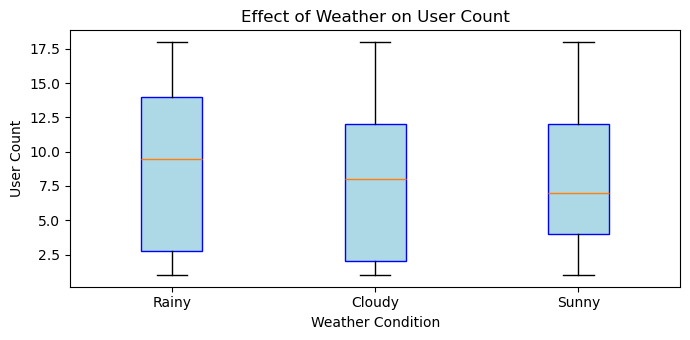

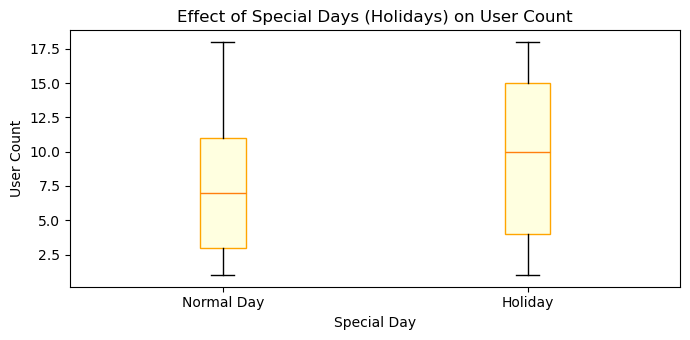

In [56]:
import matplotlib.pyplot as plt
import numpy as np


# Effect of Weather on User Count (Boxplot)
weather_conditions = data_cleaned['Weather'].unique()
user_counts_weather = [data_cleaned[data_cleaned['Weather'] == weather]['User Count'].values for weather in weather_conditions]

plt.figure(figsize=(7, 3.5))
plt.boxplot(user_counts_weather, labels=weather_conditions, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'))
plt.title("Effect of Weather on User Count")
plt.xlabel("Weather Condition")
plt.ylabel("User Count")
plt.tight_layout()
plt.show()

# Extract unique special days and corresponding user counts
special_days = data_cleaned['Special Day'].unique()
user_counts_special_day = [data_cleaned[data_cleaned['Special Day'] == special]['User Count'].values for special in special_days]

# Plot the boxplot with proper labels and spacing
plt.figure(figsize=(7, 3.5))
plt.boxplot(user_counts_special_day, labels=["Normal Day", "Holiday"], patch_artist=True, 
            boxprops=dict(facecolor='lightyellow', color='orange'))
plt.title("Effect of Special Days (Holidays) on User Count")
plt.xlabel("Special Day")
plt.ylabel("User Count")

# Ensure xticks match the boxplot labels
plt.xticks([1, 2], ["Normal Day", "Holiday"])  # Boxplot indexes start at 1
plt.tight_layout()
plt.show()



# Data Aggregation

In this step, the data is aggregated to calculate the **mean user count** for different categorical variables.

1. **Aggregating by Day**: The average user count is calculated for each day of the week using `groupby('Day')` and `mean()`.
   
2. **Aggregating by Time Slot**: Similarly, the average user count is calculated for each time slot using `groupby('Time Slot')`.

3. **Aggregating by Weather**: The average user count is calculated for each weather condition using `groupby('Weather')`.

The results are stored in three variables: `agg_day`, `agg_time_slot`, and `agg_weather`, which contain the mean user counts for each of the respective cualization.


In [58]:
# Aggregate by Day, Time Slot, and Weather to get mean user counts
agg_day = data_cleaned.groupby('Day')['User Count'].mean()
agg_time_slot = data_cleaned.groupby('Time Slot')['User Count'].mean()
agg_weather = data_cleaned.groupby('Weather')['User Count'].mean()

# Display the results of aggregation
print(agg_day)
print(agg_time_slot)
print(agg_weather)


Day
Friday       7.056338
Monday       8.142857
Saturday     9.722222
Sunday       8.459459
Thursday     7.297619
Tuesday      8.280488
Wednesday    6.947368
Name: User Count, dtype: float64
Time Slot
00:00:00     1.307692
00:30:00     1.444444
01:00:00     1.500000
01:30:00     1.750000
02:00:00     1.500000
02:30:00     1.545455
03:00:00     1.333333
03:30:00     1.615385
04:00:00     1.555556
04:30:00     1.600000
05:00:00    10.692308
05:30:00    10.285714
06:00:00    11.142857
06:30:00    10.230769
07:00:00    10.153846
07:30:00     9.846154
08:00:00    14.666667
08:30:00    14.642857
09:00:00    15.583333
09:30:00    14.545455
10:00:00    13.888889
10:30:00    14.900000
11:00:00     6.909091
11:30:00     7.545455
12:00:00     7.916667
12:30:00     8.181818
13:00:00     7.625000
13:30:00     6.875000
14:00:00     5.000000
14:30:00     5.333333
15:00:00     5.461538
15:30:00     5.600000
16:00:00     5.583333
16:30:00     6.266667
17:00:00    14.500000
17:30:00    13.714286
18:00:0

## DATA DISCRETIZATION
In this step, we create new categorical features by discretizing continuous variables into meaningful groups.

### 1. **Time of Day Categorization**:
   - We define a function `time_of_day` to categorize the `Time Slot` into four periods: Morning, Afternoon, Evening, and Night.
   - The `Time Slot` values are split into hours, and based on the hour range, the corresponding time period is assigned.
     - Morning: 5 AM to 11 AM
     - Afternoon: 12 PM to 4 PM
     - Evening: 5 PM to 8 PM
     - Night: 9 PM to 4 AM

   This new information is added as a column called `Time Period` in the dataset.

### 2. **User Count Categorization**:
   - The `user_count_category` function is used to categorize the `User Count` into three categories:
     - Low: 0-5
     - Medium: 6-15
     - High: 16+
   
   This is applied to the `User Count` column, creating a new categorical column called `User Count Category`.

### The result is a dataset with additional categorical features that can help in understanding and analyzing user patterns.

In [28]:
# Define time categories (e.g., Morning, Afternoon, Evening)3
def time_of_day(slot):
    hour = int(slot.split(":")[0])
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new 'Time Period' column
data_cleaned['Time Period'] = data_cleaned['Time Slot'].apply(time_of_day)

# Define user count categories: Low (0-5), Medium (6-15), High (16+)
def user_count_category(count):
    if count <= 5:
        return 'Low'
    elif 6 <= count <= 15:
        return 'Medium'
    else:
        return 'High'

# Apply the function to create a new 'User Count Category' column
data_cleaned['User Count Category'] = data_cleaned['User Count'].apply(user_count_category)

# Display the modified dataset with new generalizations
print(data_cleaned.head())


        Date        Day Time Slot  User Count  Special Day Weather  \
0 2023-11-01  Wednesday  02:30:00           2            0   Rainy   
1 2023-11-01  Wednesday  07:00:00          11            0   Rainy   
2 2023-11-01  Wednesday  07:30:00           9            0   Rainy   
3 2023-11-01  Wednesday  09:00:00          18            0   Rainy   
4 2023-11-01  Wednesday  11:30:00           9            0   Rainy   

  Time Period User Count Category  
0       Night                 Low  
1     Morning              Medium  
2     Morning              Medium  
3     Morning                High  
4     Morning              Medium  


## DESCRIPTIVE STATISTICS


In [30]:
# Descriptive statistics for User Count

#Central Tendencies
mean_user_count = data_cleaned['User Count'].mean()
median_user_count = data_cleaned['User Count'].median()
mode_user_count = data_cleaned['User Count'].mode()[0]  # Taking first mode in case of multiple modes
variance_user_count = data_cleaned['User Count'].var()

#Skewness
skewness=data_cleaned['User Count'].skew()

#Summary
data_summary = data_cleaned.describe()
print(data_summary)

mean_user_count, median_user_count, mode_user_count, variance_user_count,skewness


                                Date  User Count  Special Day
count                            550  550.000000   550.000000
mean   2023-10-17 14:26:37.090909184    7.978182     0.321818
min              2023-10-02 00:00:00    1.000000     0.000000
25%              2023-10-10 00:00:00    3.000000     0.000000
50%              2023-10-17 00:00:00    8.000000     0.000000
75%              2023-10-25 00:00:00   12.000000     1.000000
max              2023-11-02 00:00:00   18.000000     1.000000
std                              NaN    5.193126     0.467599


(7.9781818181818185, 8.0, 2, 26.968557708229692, 0.2618654087163824)

## INFERENTIAL STATISTICS

### Hypothesis Testing 
To calculate a 95% confidence interval for the mean of the `User Count` variable, we use the `scipy.stats.t.interval` method. This method calculates the confidence interval based on the t-distribution, which is used when the sample size is small, and the population standard deviation is unknown.

### Confidence Interval
We will perform a **two-sample t-test** to compare the average `User Count` on Normal Days and Special Days.

In [32]:
import scipy.stats as stats

# Split the data based on Special Day (0 = Normal, 1 = Holiday)
normal_day_users = data_cleaned[data_cleaned['Special Day'] == 0]['User Count']
holiday_users = data_cleaned[data_cleaned['Special Day'] == 1]['User Count']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(normal_day_users, holiday_users)

# Output the results
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The means are significantly different.")
else:
    print("Fail to reject the null hypothesis: The means are not significantly different.")


# User Count data
user_count_data = data_cleaned['User Count']

# Calculate sample mean and standard error of the mean
mean = np.mean(user_count_data)
std_err = stats.sem(user_count_data)  # Standard error of the mean

# Define the confidence level (95%)
confidence_level = 0.95

# Calculate the confidence interval for the mean
ci = stats.t.interval(confidence_level, len(user_count_data)-1, loc=mean, scale=std_err)

print(f"95% Confidence Interval for User Count Mean: {ci}")



t-statistic: -5.5370634470312465
p-value: 4.777465750899894e-08
Reject the null hypothesis: The means are significantly different.
95% Confidence Interval for User Count Mean: (7.543217027471462, 8.413146608892175)


# DATA VISUALISATION

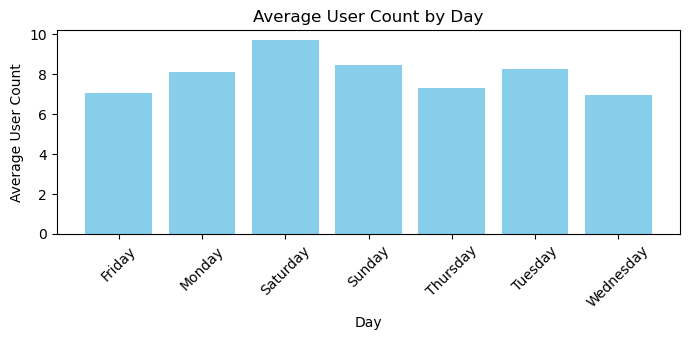

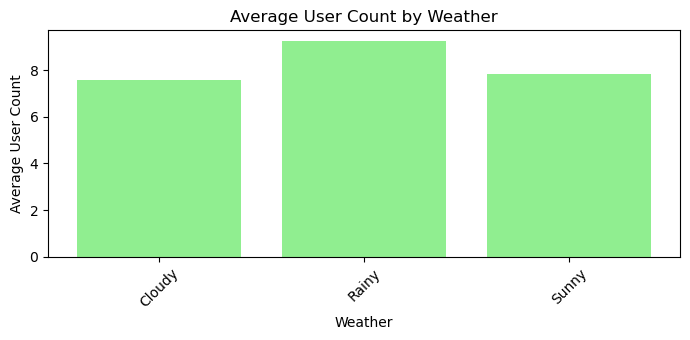

Index(['Date', 'Day', 'Time Slot', 'User Count', 'Special Day', 'Weather',
       'Time Period', 'User Count Category'],
      dtype='object')


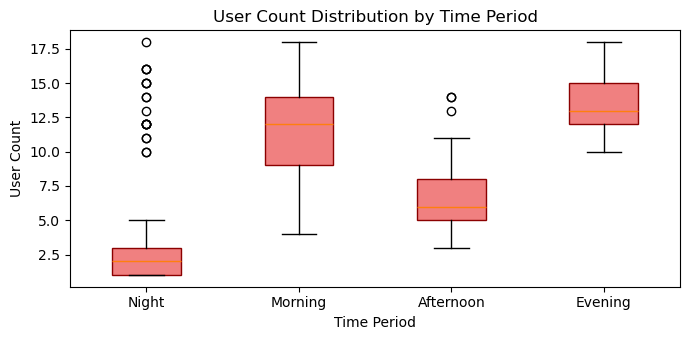

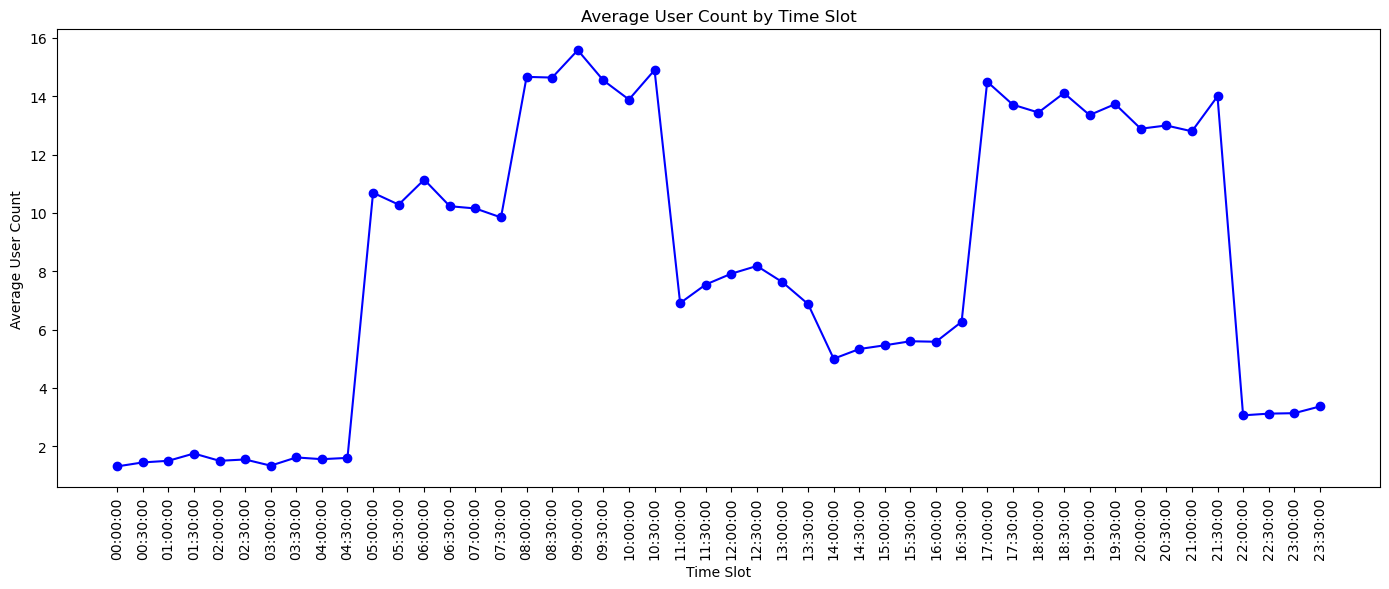

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# User Count by Day of the Week (Barplot)
avg_user_count_by_day = data_cleaned.groupby('Day')['User Count'].mean()

plt.figure(figsize=(7, 3.5))
plt.bar(avg_user_count_by_day.index, avg_user_count_by_day.values, color='skyblue')
plt.title('Average User Count by Day')
plt.xlabel('Day')
plt.ylabel('Average User Count')
plt.xticks(rotation=45)  # Rotate day labels for better visibility
plt.tight_layout()
plt.show()

# User Count by Weather Condition (Barplot)
avg_user_count_by_weather = data_cleaned.groupby('Weather')['User Count'].mean()

plt.figure(figsize=(7, 3.5))
plt.bar(avg_user_count_by_weather.index, avg_user_count_by_weather.values, color='lightgreen')
plt.title('Average User Count by Weather')
plt.xlabel('Weather')
plt.ylabel('Average User Count')
plt.xticks(rotation=45)  # Rotate weather labels
plt.tight_layout()
plt.show()

# User Count by Time Period (Boxplot)
plt.figure(figsize=(7, 3.5))
print(data_cleaned.columns)

time_periods = data_cleaned['Time Period'].unique()
user_counts = [data_cleaned[data_cleaned['Time Period'] == time]['User Count'].values for time in time_periods]

plt.boxplot(user_counts, labels=time_periods, patch_artist=True, boxprops=dict(facecolor='lightcoral', color='darkred'))
plt.title('User Count Distribution by Time Period')
plt.xlabel('Time Period')
plt.ylabel('User Count')
plt.tight_layout()
plt.show()

# User Count by Time Slot (Line Plot)
avg_user_count_by_time_slot = data_cleaned.groupby('Time Slot')['User Count'].mean()

plt.figure(figsize=(14, 6))
plt.plot(avg_user_count_by_time_slot.index, avg_user_count_by_time_slot.values, marker='o', color='b', linestyle='-', markersize=6)
plt.xticks(rotation=90)
plt.title("Average User Count by Time Slot")
plt.xlabel("Time Slot")
plt.ylabel("Average User Count")
plt.tight_layout()
plt.show()

## TRAINING AND TESTING
#### 3. **Splitting Data into Training and Test Sets**:
   - We use `train_test_split()` from `sklearn.model_selection` to split the data into training and testing sets.
   - `X_encoded` contains the encoded features, and `y` is the target variable.
   - 80% of the data is used for training, and 20% is reserved for testing. The `random_state=42` ensures reproducibility of the split.


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Define features and target
X = data_cleaned[['Day', 'Time Period', 'Special Day', 'Weather']]
y = data_cleaned['User Count']

# Separate the 'Special Day' column before one-hot encoding
special_day_column = X['Special Day']

# Use pandas' get_dummies to perform one-hot encoding on the categorical columns
X_encoded = pd.get_dummies(X[['Day', 'Time Period', 'Weather']], drop_first=True)

# Add the 'Special Day' column back to the encoded DataFrame
X_encoded['Special Day'] = special_day_column.reset_index(drop=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

# Fit the scaler on the training data, then transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model (assuming you have a Linear Regression model)
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)



## MODEL EVALUTION
   - **Mean Squared Error (MSE)** ,**Mean Absolute Error (MAE)** and **R-squared (R²)** are used to evaluate model performance:
     - **MSE** measures the average squared difference between predicted and actual values. Lower MSE indicates better performance.
     - **R²** indicates how well the model explains the variance in the target variable. Values closer to 1 are better.
     - **MAE** MAE (Mean Absolute Error) measures the average absolute difference between predicted and actual values.

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Calculate model performance (Mean Squared Error and R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Output the performance metrics
print(f'R^2: {r2:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

R^2: 0.79
Mean Squared Error: 6.00
Mean Absolute Error: 1.82


## VISUALISATION OF RESULT
 - **Scatter Plot of Actual vs. Predicted User Counts**: 
     - This plot shows how closely the predicted values (from the model) align with the actual values. A perfect prediction would fall along the red diagonal line. The scatter around this line indicates the error in predictions.
   
   - **Residuals Plot**: 
     - The residuals (difference between actual and predicted values) are plotted. This helps in assessing the model’s error distribution. Ideally, residuals should be randomly distributed around zero, indicating that the model's errors are unbiased.

# INTERFACE FOR THE MODEL

In [ ]:
import pandas as pd

def predict_user_count():
    # Get user input for the features
    day = input("Enter the day of the week (e.g., Monday): ")
    time_period = input("Enter the time period (e.g., Morning): ")
    special_day = int(input("Enter 1 if it's a special day, 0 if not: "))
    weather = input("Enter the weather (Sunny, Cloudy, or Rainy): ")
    
    # Prepare the input data for prediction (as a DataFrame)
    input_data = pd.DataFrame({
        'Day': [day],
        'Time Period': [time_period],
        'Special Day': [special_day],
        'Weather': [weather]
    })
    
    # Apply one-hot encoding to the input data (similar to what was done during training)
    input_data_encoded = pd.get_dummies(input_data[['Day', 'Time Period', 'Weather']], drop_first=True)
    
    # Ensure the 'Special Day' column is added back to the encoded data
    input_data_encoded['Special Day'] = input_data['Special Day']

    # Ensure that the columns match the order of columns used during training
    # Reorder the columns if necessary (this ensures feature names are the same)
    missing_cols = set(X_encoded.columns) - set(input_data_encoded.columns)
    for col in missing_cols:
        input_data_encoded[col] = 0  # Add missing columns with zero values
    input_data_encoded = input_data_encoded[X_encoded.columns]  # Reorder the columns to match the training set

    # Use the trained model to make a prediction
    user_count_prediction = model.predict(input_data_encoded)

    # Display the predicted user count
    print(f"Predicted User Count: {int(user_count_prediction[0])}")

# Call the function to predict based on user input
predict_user_count()
M

Enter the day of the week (e.g., Monday):  Monday


# THANK YOU !!!